In [1]:
import gymnasium as gym

import numpy as np
import random
import torch

import matplotlib.pyplot as plt

from Agents.DQNAgent import DQNAgent

In [2]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [3]:
SEEDS = [0]

## CartPole Environment

### Hyperparameter Sensitivity (Learning Rate)

In [4]:
lrs = [5e-3, 1e-3, 5e-4]
cp_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)
        env = gym.make("CartPole-v1")

        dqn_agent = DQNAgent(
            env=env,
            gamma=0.99,
            lr=lr,
            batch_size=64,
            epsilon=1.0,
            epsilon_decay=0.995,
            epsilon_min=0.01,
            hidden_dim=128,
            tau=1.0,
            num_episodes=2000,
            eval_interval=5,
            target_update_freq=10,
            constant_epsilon=False
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cp_results_lr[f"LR={lr}"] = {
        "params": {
            "gamma":0.99,
            "lr":lr,
            "batch_size":32,
            "epsilon":1.0,
            "epsilon_decay":0.995,
            "epsilon_min":0.01,
            "hidden_dim":128,
            "tau":1.0,
            "num_episodes":2000,
            "eval_interval":5,
            "target_update_freq":5,
            "constant_epsilon":False
        },
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

lr =  0.005 seed =  0


/Users/farida/PycharmProjects/RL_Project/Agents/DQNAgent.py:66: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  next_state = torch.FloatTensor(transitions.next_state)  # shape: [batch_size, state_dim]


lr =  0.001 seed =  0
lr =  0.0005 seed =  0


KeyboardInterrupt: 

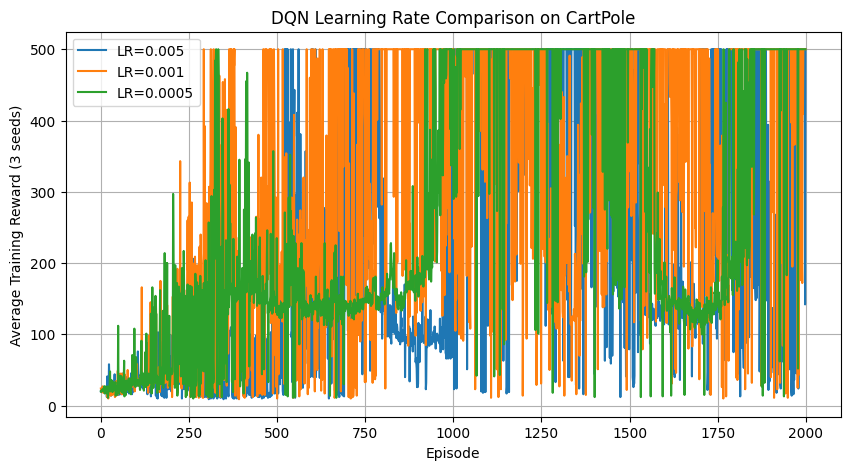

In [33]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

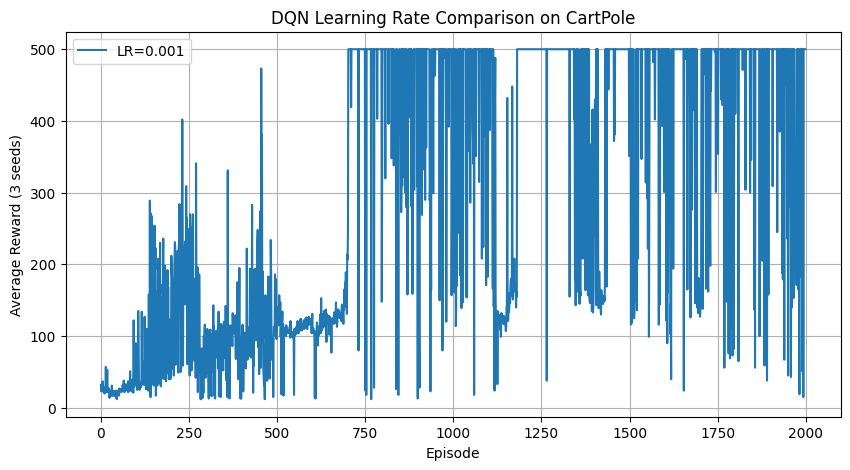

In [6]:
plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    if result["params"]["lr"] == 1e-3:
        plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

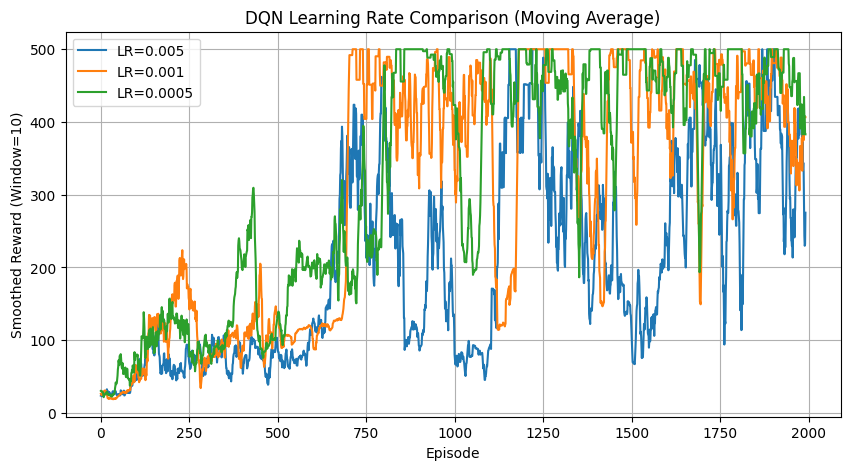

In [7]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

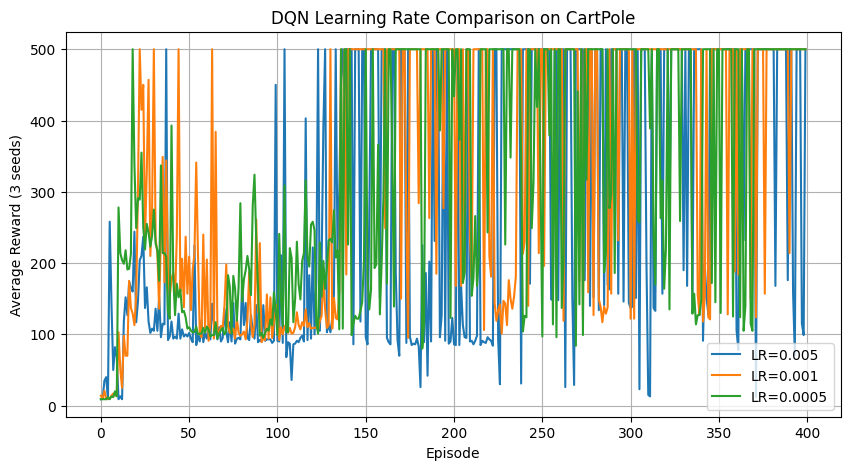

In [8]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

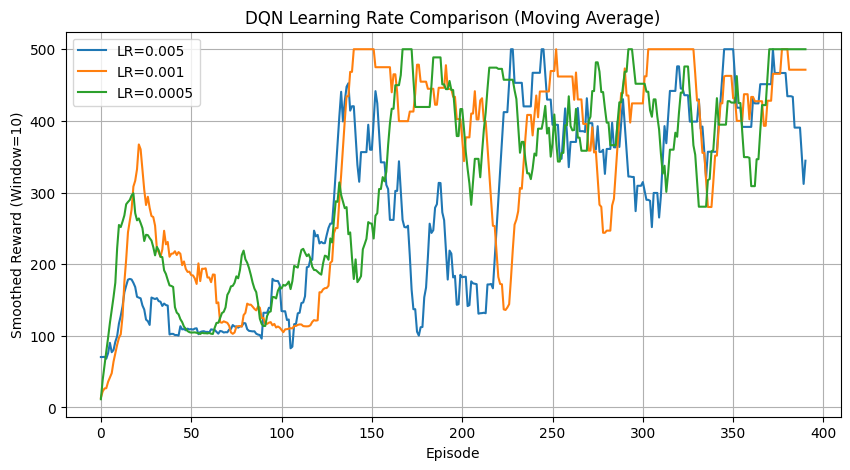

In [9]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in cp_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Evaluation Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [10]:
taus = [1.0, 0.05]
cp_results_tau = {}

for t in taus:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("tau = ", t, "seed = ", seed)
        set_seed(seed)
        env = gym.make("CartPole-v1")

        dqn_agent = DQNAgent(
            env=env,
            gamma=0.99,
            lr=1e-3,
            batch_size=64,
            epsilon=1.0,
            epsilon_decay=0.999,
            epsilon_min=0.01,
            hidden_dim=128,
            tau=t,
            num_episodes=2000,
            eval_interval=5,
            target_update_freq=5,
            constant_epsilon=False
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cp_results_tau[f"tau={t}"] = {
        "params": {
            "gamma":0.99,
            "lr":1e-3,
            "batch_size":64,
            "epsilon":1.0,
            "epsilon_decay":0.999,
            "epsilon_min":0.05,
            "hidden_dim":128,
            "tau":t,
            "num_episodes":2000,
            "eval_interval":5,
            "target_update_freq":5,
            "constant_epsilon":False
        },
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

tau =  1.0 seed =  0
tau =  0.05 seed =  0


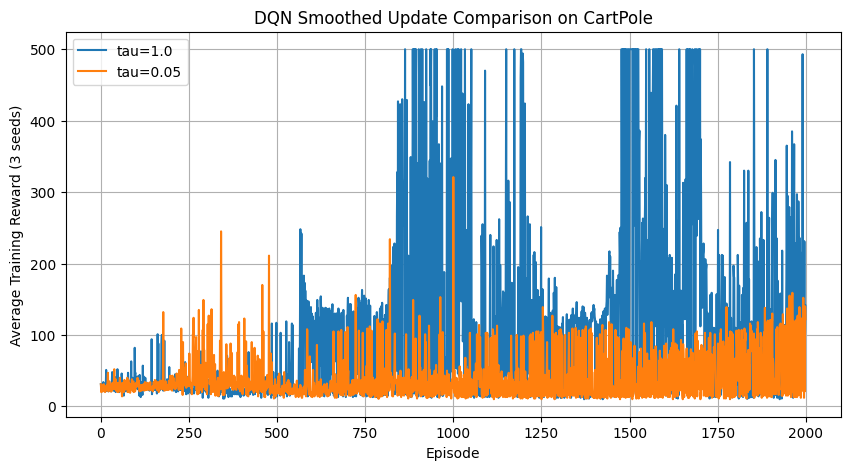

In [25]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for lr, result in cp_results_tau.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward (3 seeds)")
plt.title("DQN Smoothed Update Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

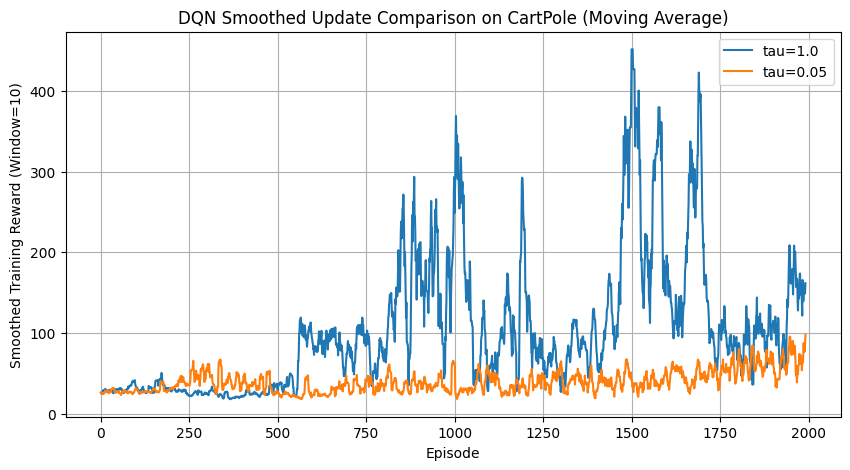

In [26]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in cp_results_tau.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Smoothed Update Comparison on CartPole (Moving Average)")
plt.legend()
plt.grid()
plt.show()

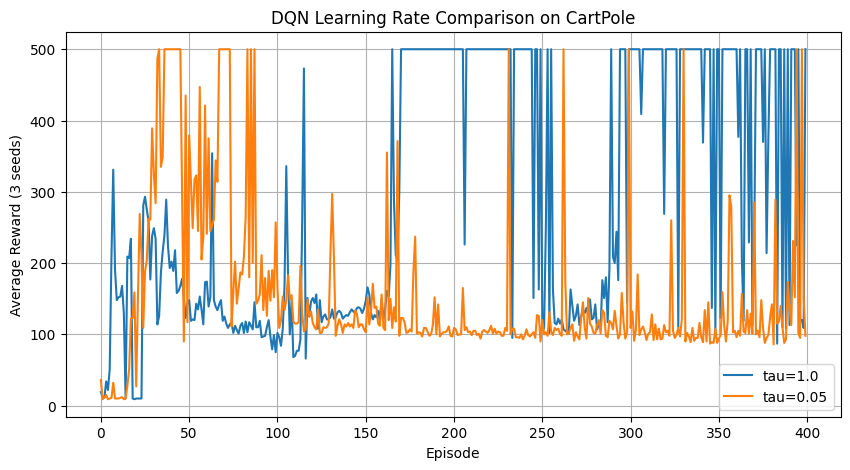

In [11]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for lr, result in cp_results_tau.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward (3 seeds)")
plt.title("DQN Smoothed Update Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

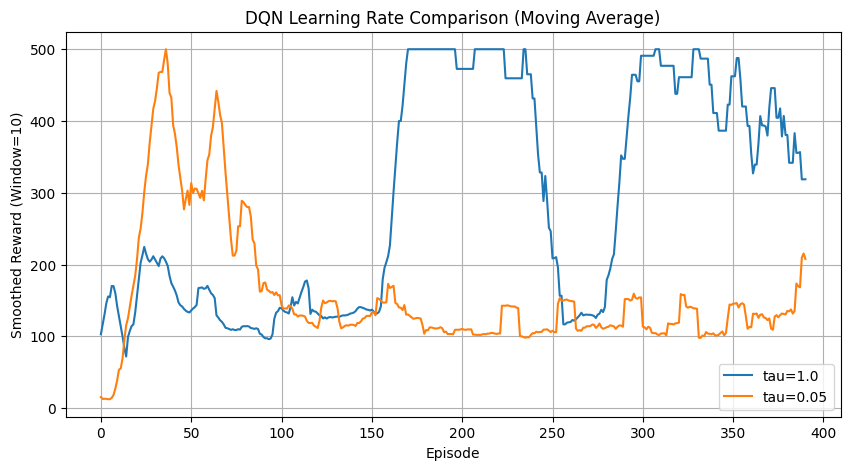

In [12]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in cp_results_tau.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Evaluation Reward (Window={window_size})")
plt.title("DQN Smoothed Update Comparison on CartPole (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Epsilon Decay)

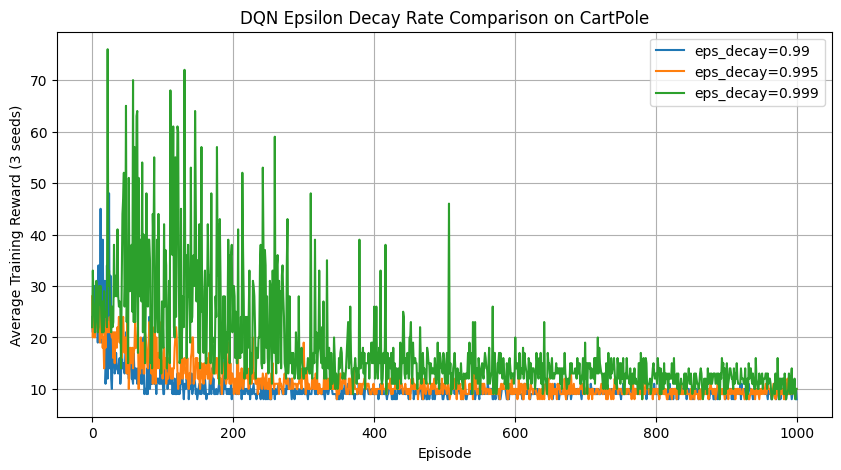

In [28]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for eps_decay, result in cartpole_results_eps_decay.items():
    plt.plot(result["avg_train_rewards"], label=eps_decay)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward (3 seeds)")
plt.title("DQN Epsilon Decay Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

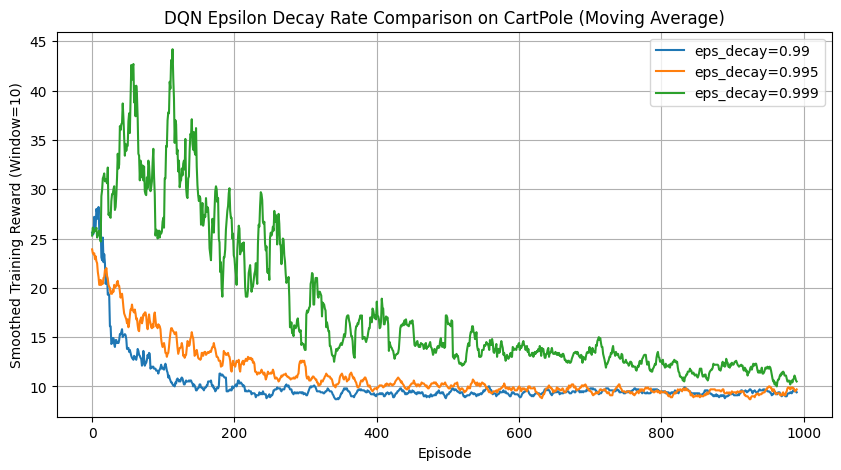

In [29]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in cartpole_results_eps_decay.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Epsilon Decay Rate Comparison on CartPole (Moving Average)")
plt.legend()
plt.grid()
plt.show()

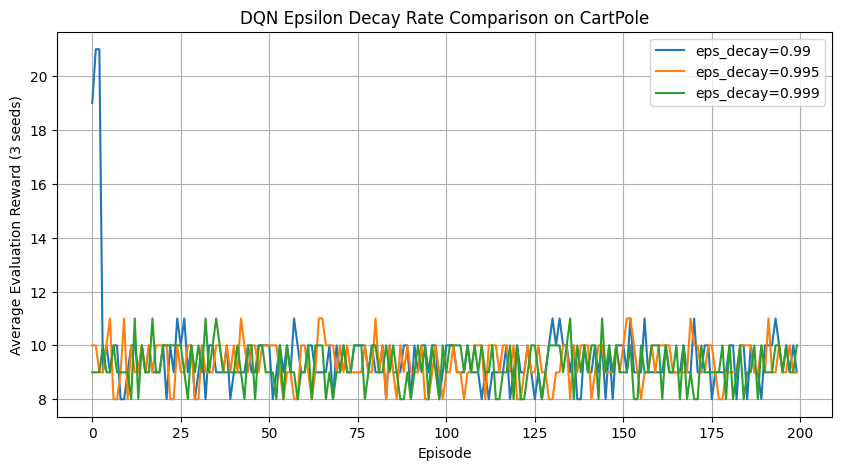

In [30]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for eps_decay, result in cartpole_results_eps_decay.items():
    plt.plot(result["avg_eval_rewards"], label=eps_decay)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward (3 seeds)")
plt.title("DQN Epsilon Decay Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

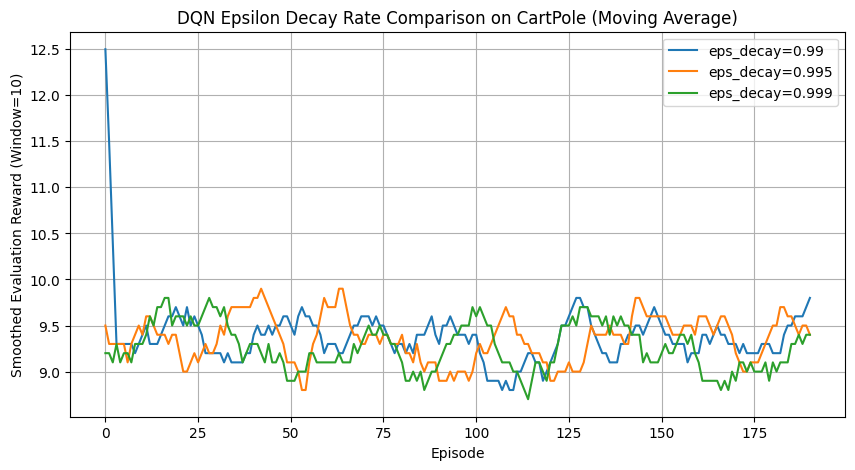

In [31]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in cartpole_results_eps_decay.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Evaluation Reward (Window={window_size})")
plt.title("DQN Epsilon Decay Rate Comparison on CartPole (Moving Average)")
plt.legend()
plt.grid()
plt.show()

eps_decay =  0.99 seed =  0
eps_decay =  0.995 seed =  0
eps_decay =  0.999 seed =  0


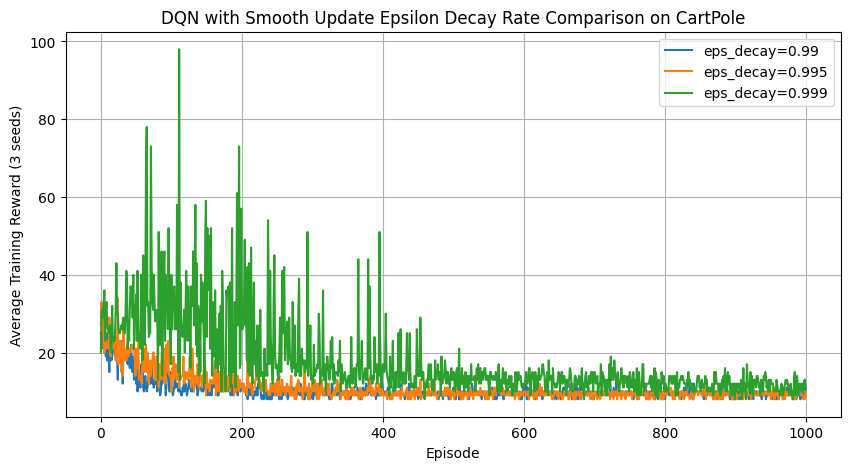

In [35]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for eps_decay, result in cartpole_results_eps_decay2.items():
    plt.plot(result["avg_train_rewards"], label=eps_decay)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward (3 seeds)")
plt.title("DQN with Smooth Update Epsilon Decay Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

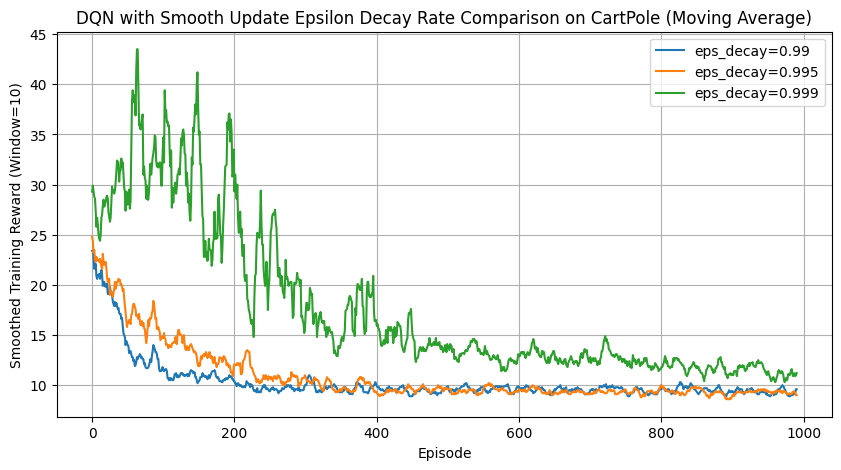

In [36]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in cartpole_results_eps_decay2.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN with Smooth Update Epsilon Decay Rate Comparison on CartPole (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [27]:
eps_decay_list = [0.99, 0.995, 0.999]
cartpole_results_eps_decay = {}

for eps_decay in eps_decay_list:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)
        env = gym.make("CartPole-v1")

        dqn_agent = DQNAgent(
            env=env,
            gamma=0.99,
            lr=1e03,
            batch_size=64,
            epsilon=1.0,
            epsilon_decay=eps_decay,
            epsilon_min=0.01,
            hidden_dim=128,
            tau=1.0,
            num_episodes=1000,
            eval_interval=5,
            target_update_freq=10,
            constant_epsilon=False
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cartpole_results_eps_decay[f"eps_decay={eps_decay}"] = {
        "params": {
            "gamma":0.99,
            "lr":1e-3,
            "batch_size":64,
            "epsilon":1.0,
            "epsilon_decay":eps_decay,
            "epsilon_min":0.01,
            "hidden_dim":128,
            "tau":1.0,
            "num_episodes":2000,
            "eval_interval":5,
            "target_update_freq":10,
            "constant_epsilon":False
        },
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

eps_decay =  0.99 seed =  0
eps_decay =  0.995 seed =  0
eps_decay =  0.999 seed =  0


In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for eps_decay, result in cartpole_results_eps_decay2.items():
    plt.plot(result["avg_eval_rewards"], label=eps_decay)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward (3 seeds)")
plt.title("DQN with Smooth Update Epsilon Decay Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in cartpole_results_eps_decay2.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Evaluation Reward (Window={window_size})")
plt.title("DQN with Smooth Update Epsilon Decay Rate Comparison on CartPole (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Batch Size)

In [ ]:
batch_sizes = [16, 32, 64, 128]
cartpole_results_bs = {}

for bs in batch_sizes:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("batch_size = ", bs, "seed = ", seed)
        set_seed(seed)
        env = gym.make("CartPole-v1")

        dqn_agent = DQNAgent(
            env=env,
            gamma=0.99,
            lr=1e03,
            batch_size=bs,
            epsilon=1.0,
            epsilon_decay=0.995,
            epsilon_min=0.01,
            hidden_dim=128,
            tau=1.0,
            num_episodes=1000,
            eval_interval=5,
            target_update_freq=10,
            constant_epsilon=False
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cartpole_results_bs[f"batch_size={bs}"] = {
        "params": {
            "gamma":0.99,
            "lr":1e-3,
            "batch_size":bs,
            "epsilon":1.0,
            "epsilon_decay":0.995,
            "epsilon_min":0.01,
            "hidden_dim":128,
            "tau":1.0,
            "num_episodes":2000,
            "eval_interval":5,
            "target_update_freq":10,
            "constant_epsilon":False
        },
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for bs, result in cartpole_results_bs.items():
    plt.plot(result["avg_train_rewards"], label=bs)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for batch_size, result in cartpole_results_bs.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{batch_size}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for bs, result in cartpole_results_bs.items():
    plt.plot(result["avg_eval_rewards"], label=bs)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for batch_size, result in cartpole_results_bs.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{batch_size}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Target Net Update Freq)

In [ ]:
update_freq = [1, 10, 20, 100]
cartpole_results_tf = {}

for bs in update_freq:
    all_rewards = []
    for seed in SEEDS:
        print("bs = ", bs, "seed = ", seed)
        set_seed(seed)
        env = gym.make("CartPole-v1")

        agent, rewards = DQNAgent.train_dqn(
            env=env,
            gamma=0.99,
            batch_size=32,
            epsilon=1.0,
            epsilon_decay=0.99,
            use_target_net=True,
            constant_epsilon=False,
            num_episodes=1500,
            target_update_freq=bs,
            lr=1e-3,
            seed=seed
        )

        all_rewards.append(rewards)

    all_rewards = np.array(all_rewards)
    avg_rewards = all_rewards.mean(axis=0)
    cartpole_results_tf[f"Batch Size={bs}"] = {
        "params": {
            "lr": 1e-3,
            "gamma": 0.99,
            "batch_size": 32,
            "epsilon_decay": 0.99,
            "target_update_freq": bs
        },
        "avg_rewards": avg_rewards
    }

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for bs, result in cartpole_results_tf.items():
    plt.plot(result["avg_rewards"], label=bs)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for batch_size, result in cartpole_results_tf.items():
    rewards = result["avg_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{batch_size}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Network Architecture)

In [ ]:
cartpole_rewards1 = []
for seed in SEEDS:
    set_seed(seed)

    env = gym.make("CartPole-v1")
    agent, rewards = DQNAgent.train_dqn(
        env=env,
        gamma=0.99,
        lr=1e-3,
        batch_size=64,
        epsilon=1.0,
        epsilon_decay=0.995,
        epsilon_min=0.01,
        use_target_net=True,
        constant_epsilon=False,
        num_episodes=1000,
        target_update_freq=10,
        seed=42,
        smooth_plot=5
    )

    cartpole_rewards1.append(rewards)

In [ ]:
cartpole_rewards1 = np.array(cartpole_rewards1)
avg_cartpole_rewards1_per_episode = cartpole_rewards1.mean(axis=0)

In [ ]:
# rolling_avg = np.convolve(avg_cartpole_rewards1_per_episode, np.ones(100)/100, mode='valid')
# plt.plot(avg_cartpole_rewards1_per_episode, alpha=0.4, label="Reward per Episode")
# plt.plot(rolling_avg, label="100-Episode Rolling Average")
# plt.title("CartPole-v1: DQN Performance")
# plt.xlabel("Episodes")
# plt.ylabel("Total Reward")
# plt.legend()
# plt.grid()
# plt.show()

## Acrobot Environment

### Hyperparameter Sensitivity (Learning Rate)

In [ ]:
lrs = [5e-3, 1e-3, 5e-4, 1e-4]
acrobot_results_lr = {}

for lr in lrs:
    all_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)
        env = gym.make("Acrobot-v1")

        agent, rewards = DQNAgent.train_dqn(
            env=env,
            gamma=0.99,
            batch_size=32,
            epsilon=1.0,
            epsilon_decay=0.99,
            use_target_net=True,
            constant_epsilon=False,
            num_episodes=1500,
            target_update_freq=10,
            lr=lr,
            seed=seed
        )

        all_rewards.append(rewards)

    all_rewards = np.array(all_rewards)
    avg_rewards = all_rewards.mean(axis=0)
    acrobot_results_lr[f"LR={lr}"] = {
        "params": {
            "lr": lr,
            "gamma": 0.99,
            "batch_size": 64,
            "epsilon_decay": 0.99,
            "target_update_freq": 10
        },
        "avg_rewards": avg_rewards
    }

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for lr, result in acrobot_results_lr.items():
    plt.plot(result["avg_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Acrobot")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for lr, result in acrobot_results_lr.items():
    rewards = result["avg_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Epsilon Decay)

In [ ]:
eps_decay_list = [0.99, 0.995, 0.999]
acrobot_results_eps_decay = {}

for eps_decay in eps_decay_list:
    all_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)
        env = gym.make("Acrobot-v1")

        agent, rewards = DQNAgent.train_dqn(
            env=env,
            gamma=0.99,
            batch_size=32,
            epsilon=1.0,
            epsilon_decay=eps_decay,
            use_target_net=True,
            constant_epsilon=False,
            num_episodes=1500,
            target_update_freq=10,
            lr=1e-3,
            seed=seed
        )

        all_rewards.append(rewards)

    all_rewards = np.array(all_rewards)
    avg_rewards = all_rewards.mean(axis=0)
    acrobot_results_eps_decay[f"eps_decay={eps_decay}"] = {
        "params": {
            "lr": 1e-3,
            "gamma": 0.99,
            "batch_size": 32,
            "epsilon_decay": eps_decay,
            "target_update_freq": 10
        },
        "avg_rewards": avg_rewards
    }

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for eps_decay, result in acrobot_results_eps_decay.items():
    plt.plot(result["avg_rewards"], label=eps_decay)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Acrobot")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in acrobot_results_eps_decay.items():
    rewards = result["avg_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Batch Size)

In [ ]:
batch_sized = [64, 32, 16]
acrobot_results_bs = {}

for bs in batch_sized:
    all_rewards = []
    for seed in SEEDS:
        print("bs = ", bs, "seed = ", seed)
        set_seed(seed)
        env = gym.make("Acrobot-v1")

        agent, rewards = DQNAgent.train_dqn(
            env=env,
            gamma=0.99,
            batch_size=bs,
            epsilon=1.0,
            epsilon_decay=0.99,
            use_target_net=True,
            constant_epsilon=False,
            num_episodes=1500,
            target_update_freq=10,
            lr=1e-3,
            seed=seed
        )

        all_rewards.append(rewards)

    all_rewards = np.array(all_rewards)
    avg_rewards = all_rewards.mean(axis=0)
    acrobot_results_bs[f"Batch Size={bs}"] = {
        "params": {
            "lr": 1e-3,
            "gamma": 0.99,
            "batch_size": bs,
            "epsilon_decay": 0.99,
            "target_update_freq": 10
        },
        "avg_rewards": avg_rewards
    }

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for bs, result in acrobot_results_bs.items():
    plt.plot(result["avg_rewards"], label=bs)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Acrobot")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for batch_size, result in acrobot_results_bs.items():
    rewards = result["avg_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{batch_size}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Target Net Update Freq)

In [ ]:
update_freq = [1, 10, 20, 100]
acrobot_results_tf = {}

for bs in update_freq:
    all_rewards = []
    for seed in SEEDS:
        print("bs = ", bs, "seed = ", seed)
        set_seed(seed)
        env = gym.make("Acrobot-v1")

        agent, rewards = DQNAgent.train_dqn(
            env=env,
            gamma=0.99,
            batch_size=32,
            epsilon=1.0,
            epsilon_decay=0.99,
            use_target_net=True,
            constant_epsilon=False,
            num_episodes=1500,
            target_update_freq=bs,
            lr=1e-3,
            seed=seed
        )

        all_rewards.append(rewards)

    all_rewards = np.array(all_rewards)
    avg_rewards = all_rewards.mean(axis=0)
    acrobot_results_tf[f"Batch Size={bs}"] = {
        "params": {
            "lr": 1e-3,
            "gamma": 0.99,
            "batch_size": 32,
            "epsilon_decay": 0.99,
            "target_update_freq": bs
        },
        "avg_rewards": avg_rewards
    }

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for bs, result in acrobot_results_tf.items():
    plt.plot(result["avg_rewards"], label=bs)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for batch_size, result in acrobot_results_tf.items():
    rewards = result["avg_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{batch_size}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

## MountainCar Environment

In [13]:
env = gym.make("MountainCar-v0")

dqn_agent = DQNAgent(
    env=env,
    gamma=0.99,
    lr=1e-3,
    batch_size=128,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01,
    hidden_dim=128,
    tau=1.0,
    num_episodes=500,
    eval_interval=5,
    target_update_freq=10,
    constant_epsilon=False
)

In [14]:
rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

### Hyperparameter Sensitivity (Learning Rate)

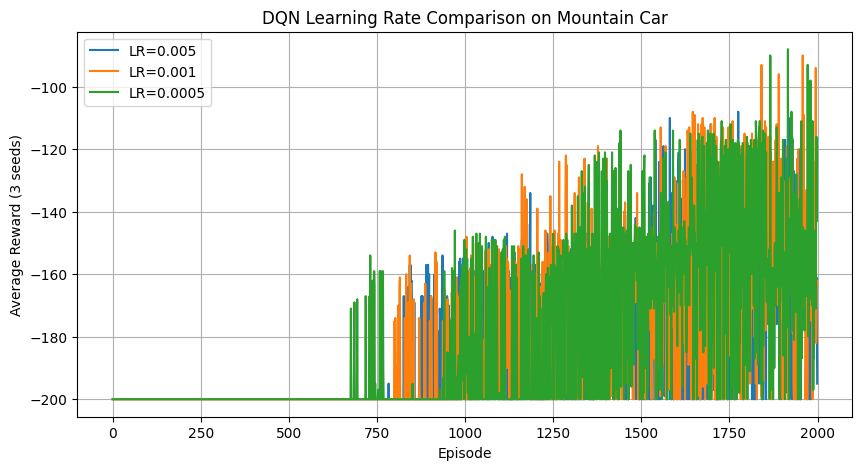

In [16]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

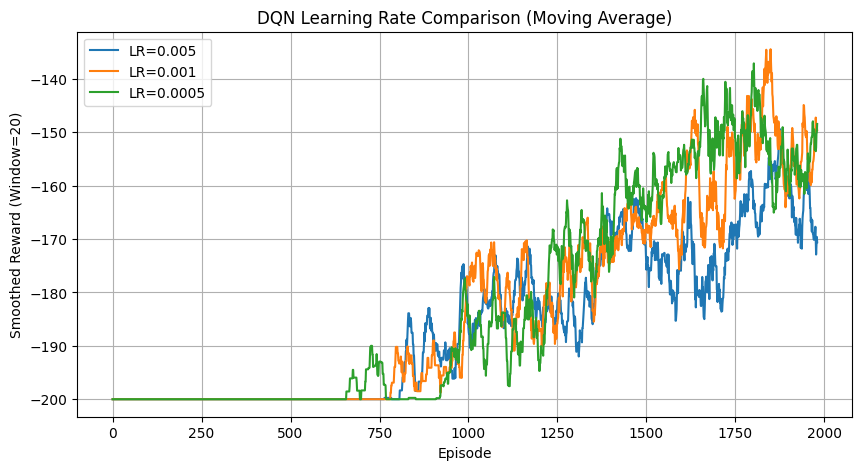

In [17]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

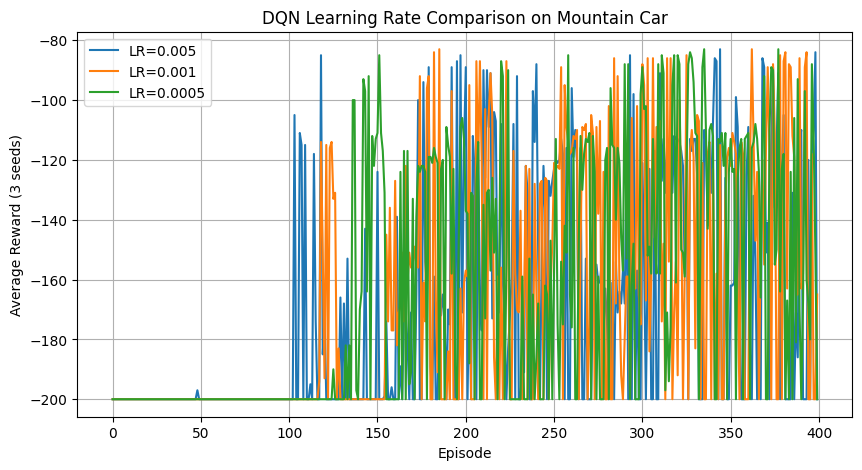

In [18]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

In [15]:
lrs = [5e-3, 1e-3, 5e-4]
mc_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)
        env = gym.make("MountainCar-v0")

        dqn_agent = DQNAgent(
            env=env,
            gamma=0.99,
            lr=lr,
            batch_size=64,
            epsilon=1.0,
            epsilon_decay=0.999,
            epsilon_min=0.01,
            hidden_dim=128,
            tau=1.0,
            num_episodes=2000,
            eval_interval=5,
            target_update_freq=5,
            constant_epsilon=False
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mc_results_lr[f"LR={lr}"] = {
        "params": {
            "gamma":0.99,
            "lr":lr,
            "batch_size":64,
            "epsilon":1.0,
            "epsilon_decay":0.995,
            "epsilon_min":0.01,
            "hidden_dim":128,
            "tau":1.0,
            "num_episodes":2000,
            "eval_interval":5,
            "target_update_freq":10,
            "constant_epsilon":False
        },
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

lr =  0.005 seed =  0
lr =  0.001 seed =  0
lr =  0.0005 seed =  0


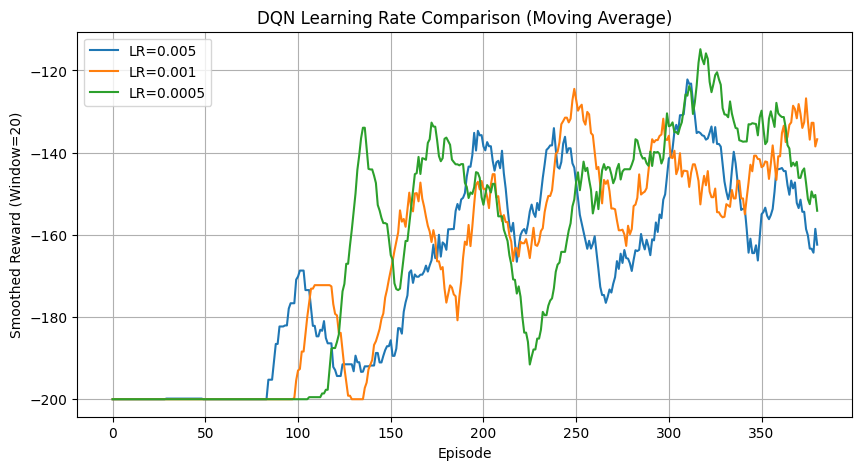

In [19]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [20]:
taus = [1.0, 0.05]
mc_results_tau = {}

for t in taus:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("tau = ", t, "seed = ", seed)
        set_seed(seed)
        env = gym.make("MountainCar-v0")

        dqn_agent = DQNAgent(
            env=env,
            gamma=0.99,
            lr=1e-3,
            batch_size=64,
            epsilon=1.0,
            epsilon_decay=0.999,
            epsilon_min=0.01,
            hidden_dim=128,
            tau=t,
            num_episodes=2000,
            eval_interval=5,
            target_update_freq=5,
            constant_epsilon=False
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mc_results_tau[f"tau={t}"] = {
        "params": {
            "gamma":0.99,
            "lr":1e-3,
            "batch_size":64,
            "epsilon":1.0,
            "epsilon_decay":0.999,
            "epsilon_min":0.05,
            "hidden_dim":128,
            "tau":t,
            "num_episodes":2000,
            "eval_interval":5,
            "target_update_freq":5,
            "constant_epsilon":False
        },
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

tau =  1.0 seed =  0
tau =  0.05 seed =  0


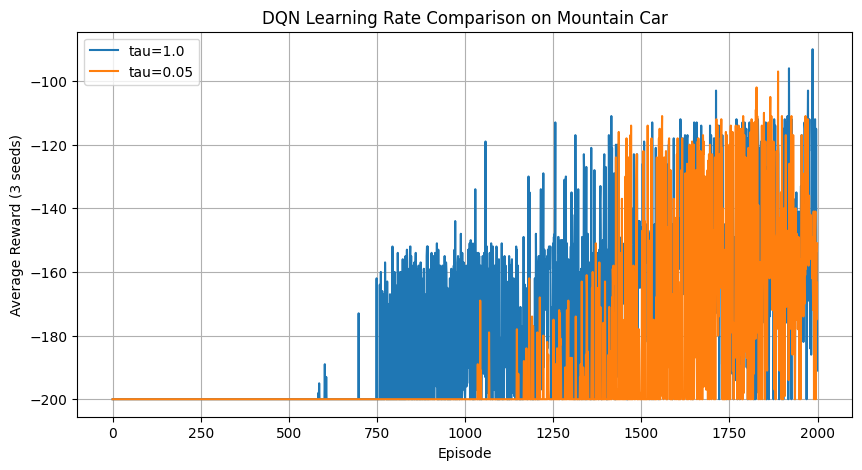

In [21]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mc_results_tau.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

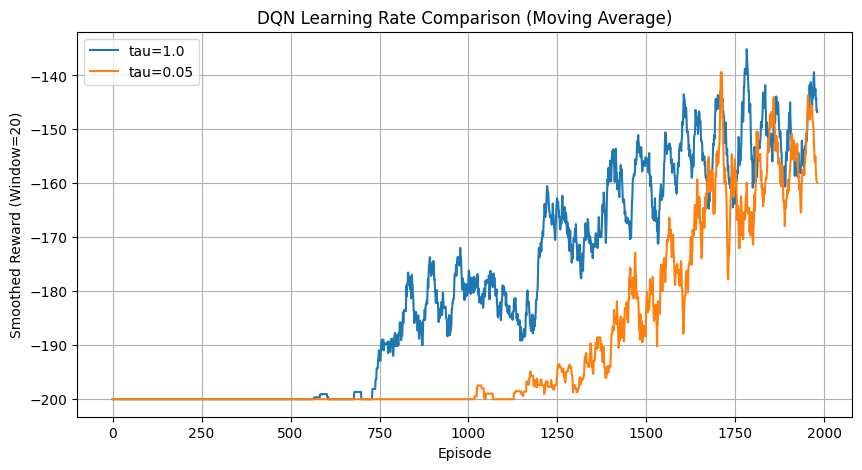

In [22]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for lr, result in mc_results_tau.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

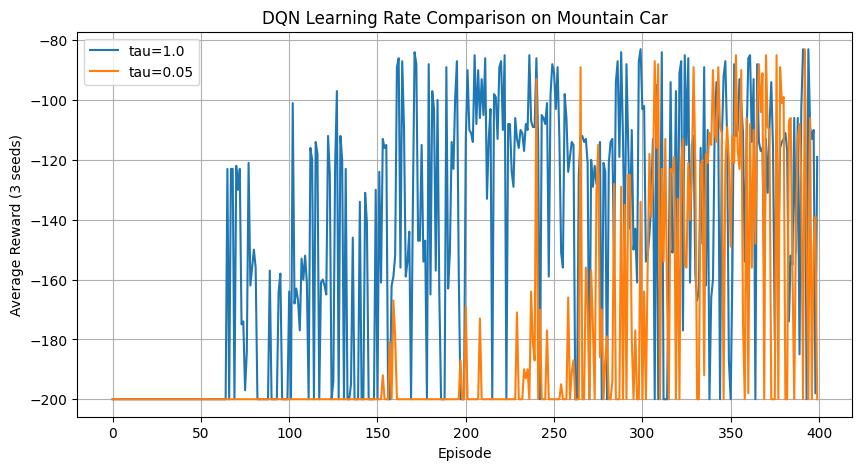

In [23]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mc_results_tau.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

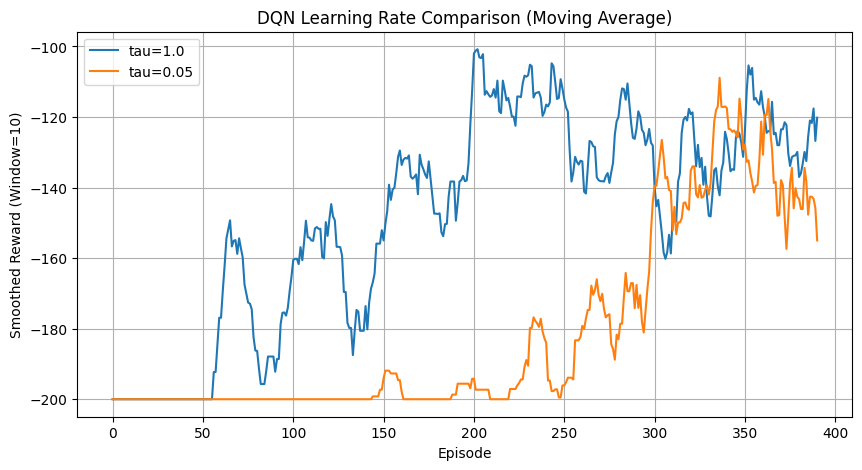

In [24]:
window_size = 10  # Smooth over 20 episodes (adjust as needed)
plt.figure(figsize=(10, 5))
for lr, result in mc_results_tau.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Epsilon Decay)

In [ ]:
eps_decay_list = [0.99, 0.995, 0.999]
mc_results_eps_decay = {}

for eps_decay in eps_decay_list:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)
        env = gym.make("MountainCar-v0")

        dqn_agent = DQNAgent(
            env=env,
            gamma=0.99,
            lr=1e-3,
            batch_size=64,
            epsilon=1.0,
            epsilon_decay=eps_decay,
            epsilon_min=0.01,
            hidden_dim=128,
            tau=1.0,
            num_episodes=2000,
            eval_interval=5,
            target_update_freq=10,
            constant_epsilon=False
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mc_results_eps_decay[f"eps_decay={eps_decay}"] = {
        "params": {
            "gamma":0.99,
            "lr":1e-3,
            "batch_size":64,
            "epsilon":1.0,
            "epsilon_decay":eps_decay,
            "epsilon_min":0.01,
            "hidden_dim":128,
            "tau":1.0,
            "num_episodes":1000,
            "eval_interval":5,
            "target_update_freq":10,
            "constant_epsilon":False
        },
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for lr, result in mc_results_eps_decay.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in mc_results_eps_decay.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for lr, result in mc_results_eps_decay.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for eps_decay, result in mc_results_eps_decay.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{eps_decay}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Batch Size)

In [ ]:
batch_sizes = [64, 32, 16]
mc_results_bs = {}

for bs in batch_sizes:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("batch_size = ", bs, "seed = ", seed)
        set_seed(seed)
        env = gym.make("MountainCar-v0")

        dqn_agent = DQNAgent(
            env=env,
            gamma=0.99,
            lr=1e-3,
            batch_size=bs,
            epsilon=1.0,
            epsilon_decay=0.995,
            epsilon_min=0.01,
            hidden_dim=128,
            tau=1.0,
            num_episodes=2000,
            eval_interval=5,
            target_update_freq=10,
            constant_epsilon=False
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mc_results_bs[f"batch_size={bs}"] = {
        "params": {
            "gamma":0.99,
            "lr":1e-3,
            "batch_size":bs,
            "epsilon":1.0,
            "epsilon_decay":0.995,
            "epsilon_min":0.01,
            "hidden_dim":128,
            "tau":1.0,
            "num_episodes":1000,
            "eval_interval":5,
            "target_update_freq":10,
            "constant_epsilon":False
        },
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for bs, result in mc_results_bs.items():
    plt.plot(result["avg_train_rewards"], label=bs)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for batch_size, result in mc_results_bs.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{batch_size}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Sensitivity (Target Net Update Freq)

In [ ]:
update_freq = [1, 10, 20, 100]
mc_results_tf = {}

for bs in update_freq:
    all_rewards = []
    for seed in SEEDS:
        print("bs = ", bs, "seed = ", seed)
        set_seed(seed)
        env = gym.make("MountainCar-v0")

        agent, rewards = DQNAgent.train_dqn(
            env=env,
            gamma=0.99,
            batch_size=32,
            epsilon=1.0,
            epsilon_decay=0.99,
            use_target_net=True,
            constant_epsilon=False,
            num_episodes=1500,
            target_update_freq=bs,
            lr=1e-3,
            seed=seed
        )

        all_rewards.append(rewards)

    all_rewards = np.array(all_rewards)
    avg_rewards = all_rewards.mean(axis=0)
    mc_results_tf[f"Batch Size={bs}"] = {
        "params": {
            "lr": 1e-3,
            "gamma": 0.99,
            "batch_size": 32,
            "epsilon_decay": 0.99,
            "target_update_freq": bs
        },
        "avg_rewards": avg_rewards
    }

In [ ]:
# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for bs, result in mc_results_tf.items():
    plt.plot(result["avg_rewards"], label=bs)
plt.xlabel("Episode")
plt.ylabel("Average Reward (3 seeds)")
plt.title("DQN Learning Rate Comparison on Mountain Car")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 20  # Smooth over 20 episodes (adjust as needed)

plt.figure(figsize=(10, 5))
for batch_size, result in mc_results_tf.items():
    rewards = result["avg_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{batch_size}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()